**Student Name: Nguyen Anh Tu**

**Student ID: 11207333**

# Problem 2: Dùng thư viện sklearn, chạy lại với các dataset dưới, nhận xét khi thay đổi perplexity

Ref: https://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html#sphx-glr-auto-examples-manifold-plot-t-sne-perplexity-py

In [29]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

circles, perplexity=5 in 0.12 sec
circles, perplexity=30 in 0.17 sec
circles, perplexity=50 in 0.19 sec
circles, perplexity=100 in 0.21 sec


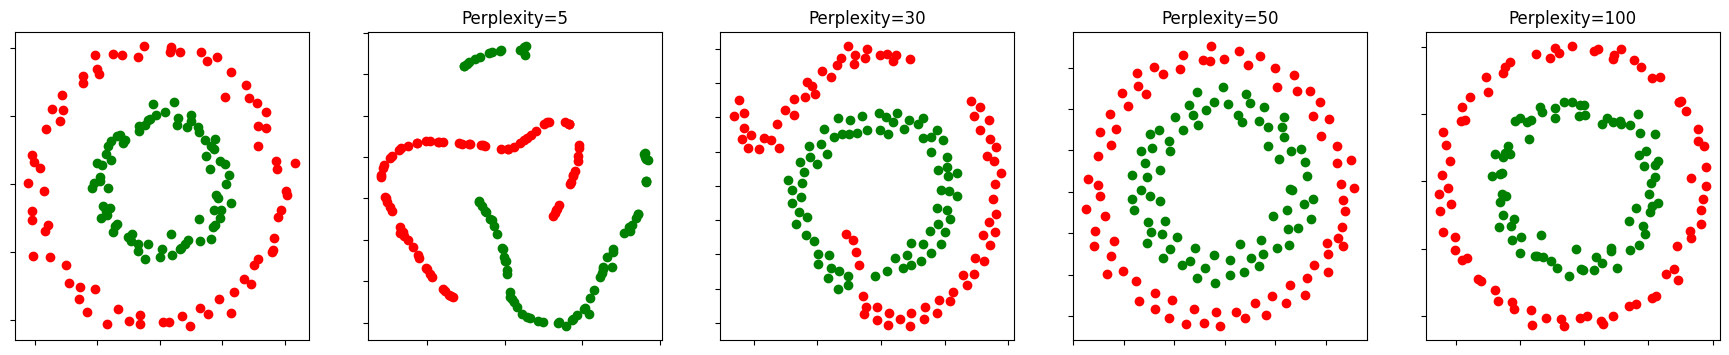

In [ ]:
n_samples = 150
n_components = 2
(fig, subplots) = plt.subplots(1, 5, figsize=(22, 4))
perplexities = [5, 30, 50, 100]
X, y = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=0)
red = y == 0
green = y == 1

ax = subplots[0]
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

for i, perplexity in enumerate(perplexities):
    ax = subplots[i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        n_iter=300,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")



S-curve, perplexity=5 in 0.13 sec
S-curve, perplexity=30 in 0.16 sec
S-curve, perplexity=50 in 0.19 sec
S-curve, perplexity=100 in 0.2 sec


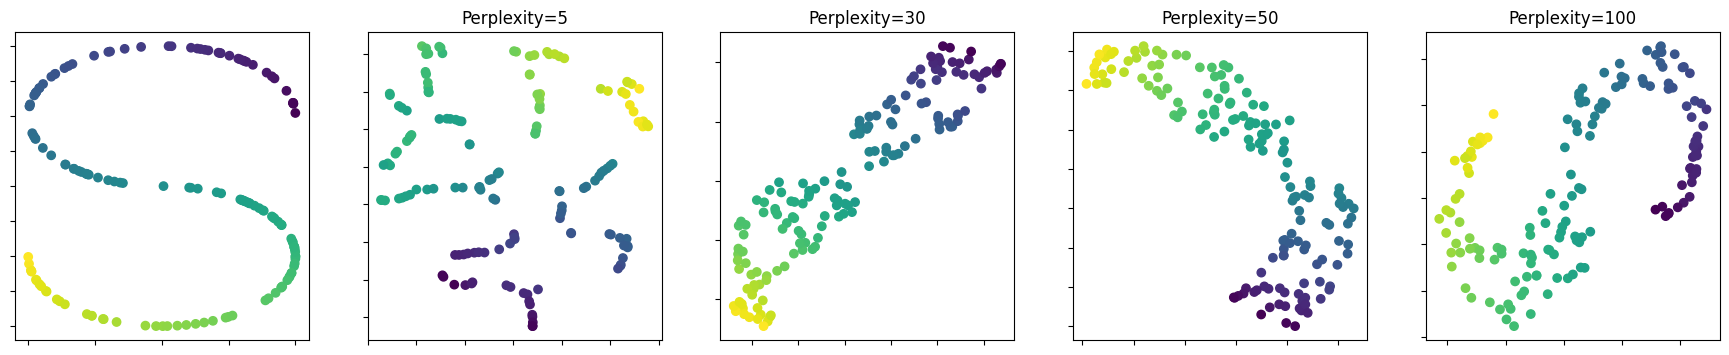

In [ ]:
# Another example using s-curve
(fig, subplots) = plt.subplots(1, 5, figsize=(22, 4))
X, color = datasets.make_s_curve(n_samples, random_state=0)

ax = subplots[0]
ax.scatter(X[:, 0], X[:, 2], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        learning_rate="auto",
        n_iter=300,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("S-curve, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")

uniform grid, perplexity=5 in 0.16 sec
uniform grid, perplexity=30 in 0.22 sec
uniform grid, perplexity=50 in 0.24 sec
uniform grid, perplexity=100 in 0.24 sec


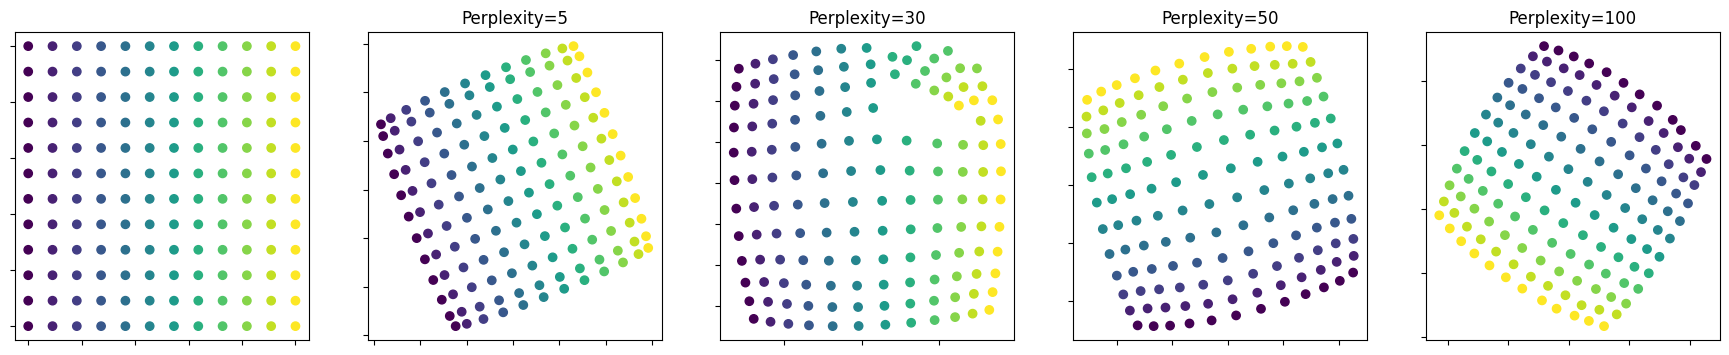

In [ ]:
# Another example using a 2D uniform grid
(fig, subplots) = plt.subplots(1, 5, figsize=(22, 4))
x = np.linspace(0, 1, int(np.sqrt(n_samples)))
xx, yy = np.meshgrid(x, x)
X = np.hstack(
    [
        xx.ravel().reshape(-1, 1),
        yy.ravel().reshape(-1, 1),
    ]
)
color = xx.ravel()
ax = subplots[0]
ax.scatter(X[:, 0], X[:, 1], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        n_iter=400,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("uniform grid, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")

**Comment:**
- For make_circles dataset, the shape tends to be clearer as the perplexity value increases. t-SNE for higher perplexities finds meaningful topology of two concentric circles, however the size and the distance of the circles varies slightly from the original.

- For make_s_curve dataset, the shape also tends to be clearer as the perplexity value increases. However, contrary to the two circles dataset, the shapes visually diverge from S-curve topology on the S-curve dataset even for larger perplexity values.

- For uniform grid, even for large perplexity values, the shapes visually differ from the original.